<a href="https://colab.research.google.com/github/Aparna0112/Aparna0112/blob/main/dynamic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT : DYNAMIC PRICING**

***Introduction***

 A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions.The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model.

A dataset containing historical ride data has been provided. The dataset includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.

***Goal***

Goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time.

***Import the required libraries***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor


***Load the dataset***

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/dynamic_pricing.csv')
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [ ]:
df['Location_Category'].unique()



array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [ ]:
df['Customer_Loyalty_Status'].unique()

array(['Silver', 'Regular', 'Gold'], dtype=object)

In [ ]:
df['Time_of_Booking'].unique()

array(['Night', 'Evening', 'Afternoon', 'Morning'], dtype=object)

In [ ]:
df['Vehicle_Type'].unique()

array(['Premium', 'Economy'], dtype=object)

***Exploratary Data Analysis***

*Countplot shows the count of observations in each categorical bin using bars.*

<Axes: xlabel='Time_of_Booking', ylabel='count'>

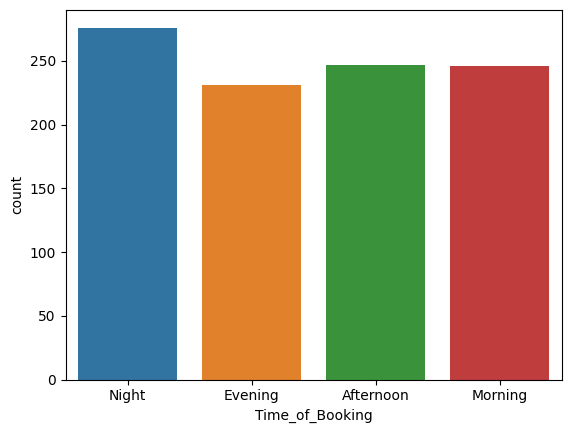

In [ ]:
sns.countplot(x='Time_of_Booking',data=df,hue='Time_of_Booking')

<Axes: xlabel='Time_of_Booking', ylabel='count'>

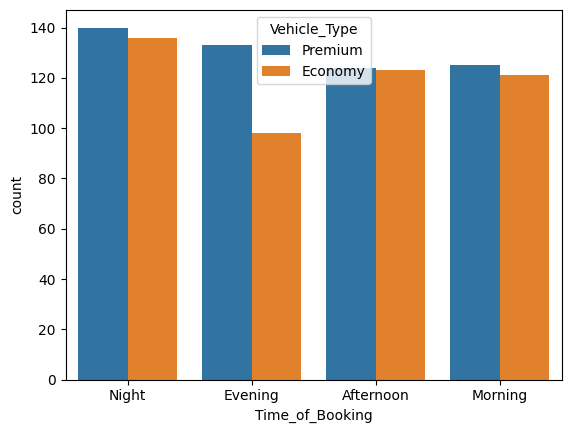

In [ ]:
sns.countplot(x='Time_of_Booking',data=df,hue='Vehicle_Type')

*A Jointplot displays the relationship between two numeric variables. It is a combination of scatterplot and histogram.*

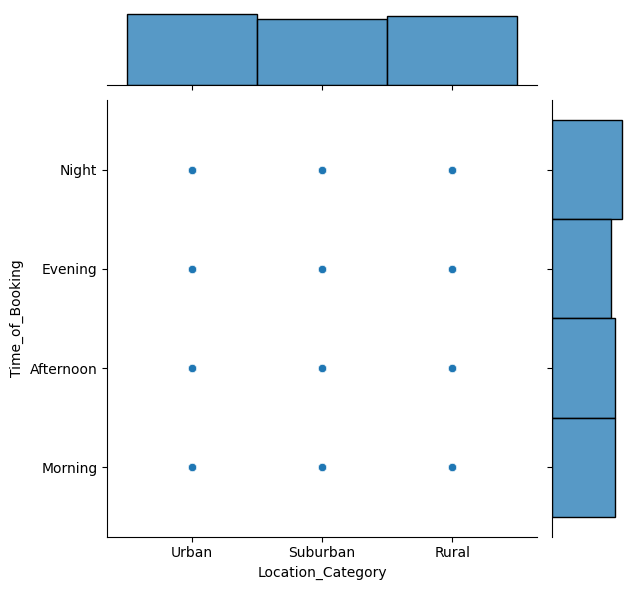

In [ ]:

sns.jointplot(x='Location_Category',y='Time_of_Booking',data=df)

*A Pie Chart is a circular statistical plot that can display only one series of data*

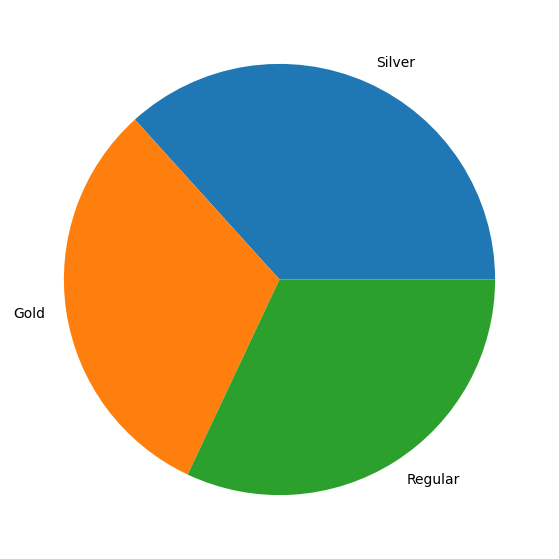

In [ ]:
status= ['Silver','Gold','Regular']
data = [367,313,320]
fig=plt.figure(figsize=(10, 7))
plt.pie(data,labels=status)
plt.show()

*Heatmap is a two-dimensional graphical representation of data where individual values that are contained in a matrix are represented using colors.Correlation is a statistical technique that is used to check how two variables are related.*

In [ ]:
df.corr()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
Number_of_Riders,1.000000,0.627016,0.029265,0.008572,-0.015856,0.005826
Number_of_Drivers,0.627016,1.000000,0.039660,0.041204,-0.024418,0.017082
Number_of_Past_Rides,0.029265,0.039660,1.000000,-0.064734,0.030679,0.035859
Average_Ratings,0.008572,0.041204,-0.064734,1.000000,-0.016968,-0.001063
Expected_Ride_Duration,-0.015856,-0.024418,0.030679,-0.016968,1.000000,0.927547
Historical_Cost_of_Ride,0.005826,0.017082,0.035859,-0.001063,0.927547,1.000000


<Axes: >

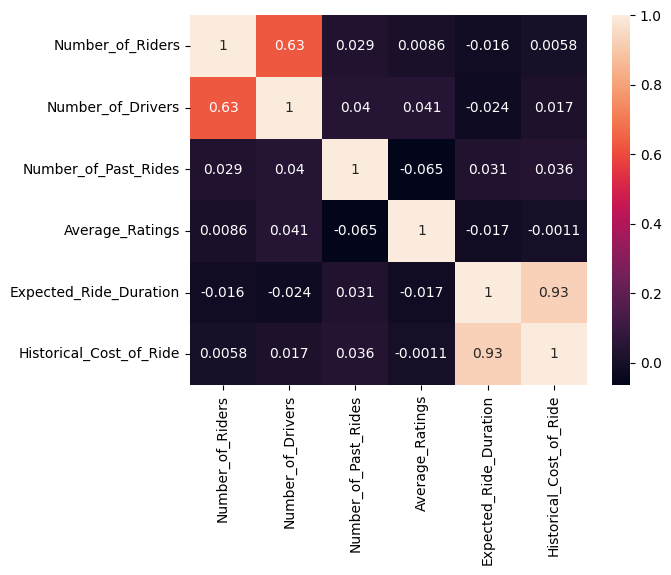

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Drop the unecessary columns**

In [ ]:
df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [ ]:
df.drop(['Number_of_Drivers','Number_of_Past_Rides','Average_Ratings'],inplace=True,axis=1)
df

,Number_of_Riders,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,Urban,Silver,Night,Premium,90,284.257273
1,58,Suburban,Silver,Evening,Economy,43,173.874753
2,42,Rural,Silver,Afternoon,Premium,76,329.795469
3,89,Rural,Regular,Afternoon,Premium,134,470.201232
4,78,Rural,Regular,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...
995,33,Urban,Gold,Morning,Premium,11,91.389526
996,84,Urban,Regular,Morning,Premium,94,424.155987
997,44,Suburban,Gold,Night,Premium,40,157.364830
998,53,Suburban,Regular,Night,Premium,58,279.095048


*Check imbalanced data*

In [ ]:
df['Historical_Cost_of_Ride'].value_counts()


284.257273    1
505.921969    1
676.440432    1
54.449538     1
267.740417    1
             ..
101.073786    1
633.496622    1
62.875093     1
92.031047     1
655.065106    1
Name: Historical_Cost_of_Ride, Length: 1000, dtype: int64

***Check missing value***

In [ ]:
df.isna().sum()

Number_of_Riders           0
Location_Category          0
Customer_Loyalty_Status    0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [ ]:
df.dtypes

Number_of_Riders             int64
Location_Category           object
Customer_Loyalty_Status     object
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

***Perform Label encoding***

In [ ]:
le=LabelEncoder()
lst=['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type']
for i in lst:
  df[i]=le.fit_transform(df[i])
df

,Number_of_Riders,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,2,2,3,1,90,351
1,58,1,2,1,0,43,174
2,42,0,2,0,1,76,445
3,89,0,1,0,1,134,683
4,78,0,1,0,0,149,849
...,...,...,...,...,...,...,...
995,33,2,0,2,1,11,52
996,84,2,1,2,1,94,601
997,44,1,0,3,1,40,148
998,53,1,1,3,1,58,337


In [ ]:
df.dtypes

Number_of_Riders           int64
Location_Category          int64
Customer_Loyalty_Status    int64
Time_of_Booking            int64
Vehicle_Type               int64
Expected_Ride_Duration     int64
Historical_Cost_of_Ride    int64
dtype: object

*Separate input and ouput variables*

In [ ]:
X=df.iloc[:,:-1]
X

,Number_of_Riders,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration
0,90,2,2,3,1,90
1,58,1,2,1,0,43
2,42,0,2,0,1,76
3,89,0,1,0,1,134
4,78,0,1,0,0,149
...,...,...,...,...,...,...
995,33,2,0,2,1,11
996,84,2,1,2,1,94
997,44,1,0,3,1,40
998,53,1,1,3,1,58


In [ ]:
y=df.iloc[:,-1]
y

0      351
1      174
2      445
3      683
4      849
      ... 
995     52
996    601
997    148
998    337
999    918
Name: Historical_Cost_of_Ride, Length: 1000, dtype: int64

**Perform scaling using MinMaxScaler**

In [ ]:
scaler=MinMaxScaler()
scaler=scaler.fit_transform(X)
scaler

array([[0.875     , 1.        , 1.        , 1.        , 1.        ,
        0.47058824],
       [0.475     , 0.5       , 1.        , 0.33333333, 0.        ,
        0.19411765],
       [0.275     , 0.        , 1.        , 0.        , 1.        ,
        0.38823529],
       ...,
       [0.3       , 0.5       , 0.        , 1.        , 1.        ,
        0.17647059],
       [0.4125    , 0.5       , 0.5       , 1.        , 1.        ,
        0.28235294],
       [0.725     , 0.        , 0.        , 0.        , 0.        ,
        0.80588235]])

***Split the dataset into train and test data***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.3)

In [ ]:
warnings.filterwarnings('ignore')

***Create Models***


*   Linear Regression


*   KNeighbor Regressor

*   SupprotVector Regressor
*   DecisionTree Regressor

*   AdaBoost Regressor
*  XGB Regressor
















In [ ]:

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred_lr))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_lr))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_lr))


r2_score: 0.8910258944998553
mean_absolute_error: 76.55955068794776
mean_squared_error: 9031.76202078838


In [ ]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)
y_pred_knn=knn.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred_knn))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_knn))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_knn))

r2_score: 0.9171913507322413
mean_absolute_error: 63.282222222222224
mean_squared_error: 6863.171851851853


In [ ]:
from sklearn.svm import SVR
sv=SVR(kernel='linear')
sv.fit(X, y)
y_pred_sv= sv.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred_sv))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_sv))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_sv))

r2_score: 0.893948358353713
mean_absolute_error: 75.38836430414827
mean_squared_error: 8789.548534187525


In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred_dt))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_dt))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_dt))

r2_score: 0.7940051594225204
mean_absolute_error: 96.02333333333333
mean_squared_error: 17072.83


In [ ]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred_rf))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_rf))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_rf))

r2_score: 0.8820021512579153
mean_absolute_error: 77.98266666666666
mean_squared_error: 9779.648879999999


In [ ]:
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)
y_pred_ab=ab.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred_ab))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_ab))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_ab))

r2_score: 0.8761023330850481
mean_absolute_error: 82.46220493480459
mean_squared_error: 10268.6251689881


In [ ]:
xg=XGBRegressor()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred_xg))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_xg))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_xg))

r2_score: 0.8400442481247441
mean_absolute_error: 88.93935631275177
mean_squared_error: 13257.115331785553


***Hyper Parameter Tuning***

In [ ]:
knn_regressor = KNeighborsRegressor()
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'] }
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weig

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
kn1=KNeighborsRegressor(n_neighbors=9,weights='distance',)
kn1.fit(X, y)
y_pred_kn1=kn1.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred_kn1))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred_kn1))
print('mean_squared_error:',mean_squared_error(y_test,y_pred_kn1))

r2_score: 0.9999932030155404
mean_absolute_error: 0.043333333333333335
mean_squared_error: 0.5633333333333334


***Accuracy***

**RESULT**: Getting highest accuracy 99 in KNeighbor Regressor

In [ ]:
dic={'Model':['LinearRegression','KNeighbors','SVR','RandomForest','AdaBoost','DecisionTree','XGBoost'],
     'Accuracy':[86,99,87,85,85,75,81]}
df=pd.DataFrame(dic)
df

,Model,Accuracy
0,LinearRegression,86
1,KNeighbors,99
2,SVR,87
3,RandomForest,85
4,AdaBoost,85
5,DecisionTree,75
6,XGBoost,81


In [ ]:

pickle.dump(kn1,open('dyn_model.sav','wb'))
pickle.dump(scaler,open('dyn_scaler.sav','wb'))
